In [134]:
# Imports all the necessary programs
# screed for making databases
# pandas, which is a library of Python data analysis functions
# Counter tool for convenient and rapid tallies
# matplotlib for plotting
# numpy for basic computing in Python
# mpltools are more tools for matplotlib
import screed
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from mpltools import style

In [135]:
# sets our style parameters to ggplot
style.use("ggplot")

In [136]:
# tells the notebook to show the output (graphics) from matplotlib inline (in the notebook)
%matplotlib inline

In [8]:
# I added this step to unzip our index read fastq files.
!pigz -k -d -p 2 ./SeqData/index_read_*.fq.gz
# pigz unzips the files, and can do this in parallel. Could also use "gunzip" Here, the ? indicates a wildcard character, so anything
# that has 1 character before .fq.gz
# it will output files called read?.fq
# -k means keep the original, -d means decompress the input, -p means use this number of processors

In [11]:
# There also wasn't a step where the screed DB is created. So, I'm making that.
# This creates the database which it will query
# The database will have the sequence name, description, quality, and sequence itself (if those data are in the original files)
# The output will be the same file with NAME_screed
screed.read_fastq_sequences("./SeqData/index_read_1.fq")
screed.read_fastq_sequences("./SeqData/index_read_2.fq")

<ScreedDB, './SeqData/index_read_2.fq_screed'>

In [137]:
# tells the notebook where our index reads are
# This used to have .gz at the end of the fastq files
# but I feel like we should unzip them before putting them into the DB.
# So, I added the unzipping step above.
ir1 = "./SeqData/index_read_1.fq"
ir2 = "./SeqData/index_read_2.fq"

In [138]:
# Takes our index reads and turns them into databases using Screed
ir1db = screed.ScreedDB(ir1)
ir2db = screed.ScreedDB(ir2)

In [51]:
# Troubleshooting
record=ir1db[ir1db.keys()[14]]

In [52]:
# Troubleshooting
record['sequence']
# This is not the right index, but it is what is in the index file.

'TCTTTCCC'

In [57]:
# Troubleshooting
f=open("./SeqData/read1.fq")
lines = f.readlines()
print lines[1:100]

['AGGGCGTTGTGCTCGATAATGGCGACATGCATGTTGATGGCTATAAGGCCGCTTCTGACGTTCGTGATGAGTTCGTATCTGTTACTGAGAAGTTAATGGACGAATTGGCACAATGCTACAATGTGCTCAGATCGGAAGAGCGGTTCAGCAGGAATGCCGAGACCGATCTCGTATGCCGTCTTCTGCCTGAAAAAAAAAATTCTTTCTTTCTCTTTTCTTCCTCTTCTTCTCTCCCTCTTTTTTCTCTCCCCTTCTTCTCTCCCCTTTTCTTCCTCTCTCTCCTCTTTTTCTCCTTTTTTTT\n', '+\n', '6@<<@:@C7,=,CFGEG8-6@9,@1++B<,6CFGGD,,6<E,6E<,,E6,@+6B,:6,9,B6CFF?8C9,EFG,4,4,:<,CC9;A<5=?,,CC?,C,<,,7++BBB,?E5,,A<8CD,,4,9E9?B?,@:99=+++@,?,64?FED,E?>E+;D?95@33@C+>8>+),3@AE6<>:;;D:C,3;,59,2301;11*(++++++19+,++++++++1..2+))+49,++.+/0))/*))-)-(0.),00((*(39-).-02*/(,,-.*-.0**),)/,.,)()).+*))).-))+,)-(\n', '@M01032:142:000000000-A88P9:1:1101:11330:1725 1:N:0:0\n', 'TCCCTTTAATAACCTGATTCAGCGAAATCAATCTGCGGCACTTAGTAGCGGTAAAGTTAGACCAAACCATGAAACCAACATAAACATTACTGCCCGGCGTACGGGGAAGGACGTCAACAGTCACACAGTCCTTGACGGTATAATTACCACTATCATGGCGACCATCCAAAGGATAAACATCATAGGCAGTCGGGAGGGCAGTCGGAACCGAAGAAGACTCAAAGCGAACCCACCAGGCATAAAATCTAGGTTTGGCATCTAAAGCAATATTACCACCACTAGACACAACCTCATTATCCG\n', '+\n', 'BC-8@

In [139]:
# locating the tab delimited file with the index reads and the sample IDS
# Note that 0,1,2,3,4 are just row numbers
# I need to make this file in excel
# This step is making that information into a data frame (using panda), called df_map
# Note that the first items are identified by a "0" (Python uses a 0-index)
# Also note that the first column was made up by the program - not present in the initial file.
df_map = pd.read_csv("./SeqData/INDEX.txt", delimiter="\t", usecols=[0,1,2], names=["i1","i2","SampleID"])
# prints the head of the dataframe we made called df_map
df_map[1:9]

,i1,i2,SampleID
1,ACTATCTG,GACATAGT,S232
2,ACTATCTG,ACGCTACT,S233
3,ACTATCTG,ACTCACTG,S234
4,ACTATCTG,TGAGTACG,S236
5,ACTATCTG,CTGCGTAG,S237
6,ACTATCTG,TAGTCTCC,S238
7,ACTATCTG,CGAGCGAC,S239
8,ACTATCTG,ACTACGAC,S241


In [38]:
# Just a test making something lowercase. Don't need to run.
t = "GACATAGTTCATCGAG"
t = t.lower()
print t

gacatagttcatcgag


In [39]:
# Also don't need to run this.
# But it didn't work...
print t[:8] in set(df_map.i1)
print t[8:] in set(df_map.i2)

False
False


In [140]:
# This is making ...
# map calls a function (lambda) for a sequence of items (zipped)
# lambda creates a function, into which x is input. 
# Here, we are getting whatever x was at 0, 1, and 2 (so the first three columns of our data), and adding the first two
# together (our indicies), and maintaining the second one (our sample IDs).
# "Zipping" links together three elements of the same length, effectively creating an array of vectors
# So, here, we have linked together the columns in our mapping dataframe, df_map.
# Basically, we link together the three columns, using zip, and then we concatenate the first two values
# at each place and keep the last one separate, using the lambda function we created here.
# This happens using the map function - the function called is defined by lambda, the sequence of items we look at 
# is defined by the zip function
# Dict is a data structure in Python, the "dictionary"
# A dictionary has unique keys that are linked to other data
# Here we are using our map output to make the dictionary. The map created two values - our combined indicies and ID.
# Thus, the map_d.keys at a given position will be the combined index primers,
# and the map_d returned when the map_d.keys at a given position is input, will be our sample ID.
map_d = dict(map(lambda x: (x[0] + x[1], x[2]), zip(df_map.i1, df_map.i2, df_map.SampleID)))
print map_d.keys()[100], map_d[map_d.keys()[100]]

CGTGAGTGTATAGCGA S244


In [141]:
# Troubleshooting
"GTCAGATAACTCACTG" in map_d

True

In [119]:
# Troubleshooting
print map_d["GTCAGATAACTCACTG"]

S041


In [10]:
# I should already have the output from this in the folder from our pear_merged data activity from before.
screed.read_fastq_sequences("./SeqData/pear_merged-2014-03-25.assembled.fastq")

<ScreedDB, '/var/seq_data/RNASIP/pear_merged-2014-01-30.assembled.fastq_screed'>

In [142]:
# Creates the screed database
db = screed.ScreedDB("./SeqData/pear_merged-2014-03-25.assembled.fastq_screed")

In [102]:
# Troubleshooting
record = db[db.keys()[123924]]
ir1db[record["name"]]["sequence"] + ir2db[record["name"]]["sequence"]
# Ok, some of these work.
# e.g., that sequence is S041.

'GTCAGATAACTCACTG'

In [95]:
# Troubleshooting
record

{'id': 123924, 'sequence': 'TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGTTATGCAAGACAGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTTGTGACTGCATGGCTGGAGTGCGGCAGAGGGGGATGGAATTCCGCGTGTAGCAGTGAAATGCGTAGATATGCGGAGGAACACCGATGGCGAAGGCAATCCCCTGGGCCTGCACTGACGCTCATGCACGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCCTAAACGATGTCAACTGGTTGTTGGGAAGGTTCCTTCTCAGTAACGTAGCTAACGCGTGAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTG', 'annotations': '1:N:0:0', 'name': 'M01032:142:000000000-A88P9:1:1101:20850:9306', 'accuracy': 'CCCCCGGGGGGGGFFGGFGDFGFFEFFGGGFGGGGGGGGFFFGGFGGGDGGDGGGGGGGGGGGGGFGGGGGGbhaWXW]NYYNdWMY\\_b^Veb\\OSOO`O`ZGZZNOSRN[G\\RNTKOYXW\\_cbX^Y``Xd]`XZ]bbg]\\a]SVd\\ak_ijed^jhhgkkkljkgcYbeaf__d`[XiZJYcdbleZhcfhaihl^[T]j_lhhclglljihFckddf^`dV[\\kiKZcgZ\\NYcTOOXcUh_e\\i_UX`UEW]dNYZhmiSbllXlgZRclhd``_VYWXNXbi[^bbO\\YNGZ^d\\GGGGGGGF<CFGGGFFDEGFFFFGEDGGGGGGGGGGGGGGGGFCCFECGGGGGFGGGEGGFFGGGGCCCCC'}

In [121]:
# Troubleshooting
# index_concat = ir1db[record["name"]]["sequence"] + ir2db[record["name"]]["sequence"]
map_d[index_concat]
# map_d["GTCAGATAACTCACTG"]

'S041'

In [143]:
# Re-started at 11:32 PM, finished by 4:20AM
# I shouldn't've stopped it - it was probably running fine. So long as there is a star, it is working
# The "Kernel busy" message button just shows up the first time you start the process. If you reload, it doesn't reappear.

# Did a bunch of troubleshooting, figured some things out, probably was all fine, maybe had index reads in wrong order
# In a short trial, generated 17% rejected reads (not 100% match). This is fine, probably. After all, there are 16M seqs.
# That rate would leave about 13.7M sequences. Then, more QC after that.
# Re-started to run again at 6:20AM, finished by 8:15AM.

# Sets a counting index and starts the number of unassigned reads at zero.
# Defines our output as our fastq file.
# Sets up a counter function, which is actually like a dictionary.
counter = 0
unassigned = 0
cnt = Counter()
fn = "./SeqData/pear_merged-2014-03-25.assembled.demult.fastq"
# I think we open up a new file, created, as we called it under fn, [What is "w"? "w" means we are opeing the file to "w"rite]
with open(fn, "w") as out:
    # for each record in our database that we go through iteratively...
  for rec in db.itervalues(): 
        # We make a concatenated index of the ir1db and ir2db that we made earlier, joining the name and sequence
        index_concat = ir1db[rec["name"]]["sequence"] + ir2db[rec["name"]]["sequence"]
        # We create a new name from our map_d file created above (the dictionary) using the dictionary to look up what
        # it should be called, based on an input of this new name we made (making sure it's all lowercase)
        # This should spit out the ID of the sample associated with these indicies, which we then join to
        # an underscore, and the current counter value (which number sequence is this?)
        try:
            new_name = map_d[index_concat] + "_" + str(counter) #case sensitive
            # If we couldn't find the index name in our dictionary map file, we say it was unassigned, and tally it.
        except KeyError:
            unassigned += 1
            continue
            # Resetting to continue
        counter += 1
        # map_d[index_etc.lower] should give us the sample name we assigned to that index set.
        # We feed that into the counter - not quite sure what happens
        # We also increase [what?] by 1.
        cnt[map_d[index_concat]] += 1 #case sensitive
        # We define s and q as the sequecnce and accuracy values (from screed?) 
        s, q = rec["sequence"], rec["accuracy"]
        # The output written to the file we called fn will be all this..not quite sure what's going on.
        out.write("@%s orig_name=%s\n%s\n+\n%s\n"%(new_name,rec["name"],s,q))
        # Reports how many reads didn't match the mapping file. Note that we require an exact match here.
print "Unable to assign %s reads to samples"%unassigned
# The final output should be still a fastq file but now with the sample ID attached.
# For now it is called pear_merged-2014-03-25.assembled.demult.fastq

Unable to assign 2578322 reads to samples


In [132]:
# Troubleshooting
counter

115478

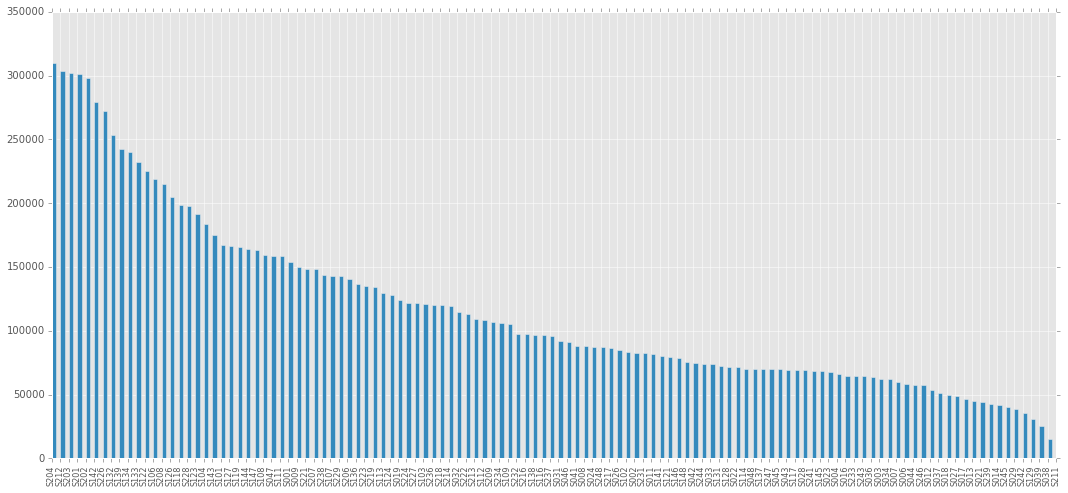

In [160]:
# Makes a plot of read counts organized by index
# Seems like it worked okay - lowest 12 reads <50,000 counts.
X = np.arange(len(cnt.keys()))
Y = [v for k, v in cnt.most_common()]
fig = plt.figure()
fig.set_size_inches((18,8))
ax = fig.add_subplot(111)
bars = ax.bar(X, Y, width=0.5)
xlims = ax.set_xlim((X.min(), X.max()))
xt = ax.set_xticks(X)

xtl = ax.set_xticklabels([k for k, v in cnt.most_common()], rotation=90, ha="center", size=8)


In [165]:
# Making sure all 120 samples did return something. That's actually great!
len(xt)

120